# Context

### Novel Coronavirus 2019 (nCoV-2019) is a virus which affects respiratory system and was first discovered in wuhan, China. Some early reports suggested that virus may have been transmitted from animal to person. As we know whole world has been shutdown  because of the widespread cases. At this time it's unclear how easily or sustainably this virus is spreading between people.

# Current Cases (WorldWide)
### To know how bad the world has been affected lets get some information on current situation.

#### Lets import all the dependencies for scrapping the website

In [1]:
import bs4
from urllib.request import Request, urlopen
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import pandas as pd

In [2]:
# grabbing the url

url = "https://ncov2019.live/"
req = Request(url, headers={"User-Agent" : "Mozilla/5.0"})

webpage = urlopen(req).read()

#parsing it as lxml
pagesoup = soup(webpage,"lxml")

#### Website Information
1. Website Name
2. Link to Website

In [3]:
from IPython.display import display, Markdown

In [4]:
#finding the relevant tags to scrap the data from website

website_name = pagesoup.find('a',class_ = "navbar-brand")
link = "https://ncov2019.live/"
Markdown('<strong>{}</strong>{}'.format(website_name.text,link))

<strong>





    nCoV2019.live
  </strong>https://ncov2019.live/

In [5]:
#some quick facts from the website

quickfacts = pagesoup.find('div', class_ = "container--wrap bg-navy-4")
Markdown('<strong align="center">{}</strong>'.format(quickfacts))

<strong align="center"><div class="container--wrap bg-navy-4">
<p style="color: #DFDFEF; font-size: 30px; text-align: center; padding-top: 15px; font-weight: bolder; margin-bottom: 0;">
    Quick Facts
  </p>
<p style="color: #DFDFEF; font-size: 12px; text-align: center; font-weight: bolder; margin-bottom: 0;">
    updated: <i class="last_updated">A few minutes ago</i>
</p>
<table>
<tr>
<p style="color: rgb(101, 221, 155); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        24,226,129
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Confirmed
      </p>
</tr>
<tr>
<p style="color: #ff9d00; font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;"> 
          61,832
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Critical
      </p>
</tr>
<tr>
<p style="color: #F65164; font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        826,753
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Deceased
      </p>
</tr>
<tr>
<p style="color: rgb(248, 245, 64); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        6,751,220
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Active
      </p>
</tr>
<tr>
<p style="color: rgb(68, 155, 226); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        16,511,188
      </p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Recovered
      </p>
</tr>
<tr>
<p style="color: rgb(62, 206, 229); font-weight: bold; text-align: center; border-bottom: 0; font-size: 50px; margin-bottom: 0px;">
        166<!--  / 43 -->
</p>
<p style="color: #DFDFEF; font-size: 18px; font-weight: bold; border-bottom: 0; text-align: center;">
        Total Vaccines In Development
      </p>
</tr>
</table>
</div></strong>

## World COVID-19 Stats

#### We will scrap worldwide covid cases.
1. We'll use pandas read.html which lets us read the webpage table without much of complexity.
2. Convert the table into dataframe for further processing.
3. In the header of the list generated you see a number "1", which was used in the original website as a filter for arranging data in ascending or descending order.

In [6]:
import pandas as pd
import requests

In [7]:
# grabbing latest worldwide data

url = "https://ncov2019.live/data/world"

r = requests.get(url)
df_list = pd.read_html(r.text)            #this parse all html tables from a webpage to alist
world_df = df_list[2]
world_df

Name  Confirmed Per Million  Changes Today  \
0                           TOTAL   24226129        3118         174858   
1                  ★  Afghanistan      38113         976             43   
2                      ★  Albania       8927        3103            168   
3                      ★  Algeria      42619         969            391   
4                      ★  Andorra       1098           0             38   
..                            ...        ...         ...            ...   
210      ★  Caribbean Netherlands         13           0              0   
211           ★  Falkland Islands         13           0              0   
212  ★  Saint Pierre and Miquelon          5           0              0   
213                   ★  Anguilla          3           0              0   
214                      ★  China      84996          59             15   

    Percentage Day Change Critical Deceased Per Million.1  Changes Today.1  \
0                   0.73%    61832   826753           106             4027   
1                   0.11%       31     1401            36                4   
2                   1.92%       19      263            91                4   
3                   0.93%       28     1465            33                9   
4                   3.58%        3       53             0                0   
..                    ...      ...      ...           ...              ...   
210                    0%  Unknown  Unknown       Unknown                0   
211                    0%  Unknown  Unknown       Unknown                0   
212                    0%  Unknown  Unknown       Unknown                0   
213                    0%  Unknown  Unknown       Unknown                0   
214                 0.02%        8     4634             3                0   

    Percentage Death Change      Tests   Active Recovered Per Million.2  \
0                     0.49%  423263559  6751220  16511188          2125   
1                     0.29%     101893     7670     29042           744   
2                     1.54%      54353     4031      4633          1610   
3                     0.62%    Unknown  Unknown     29886           680   
4                        0%     137457      152       893             0   
..                      ...        ...      ...       ...           ...   
210                      0%        424  Unknown         7             0   
211                      0%       2256  Unknown        13             0   
212                      0%    Unknown  Unknown         1             0   
213                      0%        662  Unknown         3             0   
214                      0%   90410000      347     80015            56   

     Population  
0    7769695146  
1      39055070  
2       2877308  
3      43967239  
4         77284  
..          ...  
210       26260  
211        3494  
212        5790  
213       15023  
214  1439323776  

[215 rows x 15 columns]

#### Sorting the data on number of confirmed cases

In [8]:
# We will now sort the countries based on total confirmed cases column

world_df = world_df.sort_values("Confirmed" , ascending = False)



#Lets get top 10 affected countries

world_df.head(10)


Name  Confirmed Per Million  Changes Today  \
0               TOTAL   24226129        3118         174858   
169  ★  United States    5979233       18048          23505   
170         ★  Brazil    3683224       17309           9048   
171          ★  India    3307575        2393          75821   
172         ★  Russia     970865        6652           4676   
142   ★  South Africa     613017       10317              0   
173           ★  Peru     607382       18383              0   
174         ★  Mexico     568621        4403           4916   
175       ★  Colombia     562128       11030              0   
176          ★  Spain     419849        8979           3594   

    Percentage Day Change Critical Deceased Per Million.1  Changes Today.1  \
0                   0.73%    61832   826753           106             4027   
169                 0.39%    16511   183128           553              724   
170                 0.25%     8318   116964           550              298   
171                 2.35%     8944    60627            44             1015   
172                 0.48%     2300    16683           114              115   
142                    0%      539    13308           224                0   
173                    0%     1522    28001           847                0   
174                 0.87%     3442    61450           476              650   
175                    0%     1493    17889           351                0   
176                 0.86%      697    28971           620               47   

    Percentage Death Change      Tests   Active Recovered Per Million.2  \
0                     0.49%  423263559  6751220  16511188          2125   
169                    0.4%   78270815  2534431   3261674          9845   
170                   0.26%   14172764   717865   2848395         13386   
171                    1.7%   37651512   725653   2521295          1824   
172                   0.69%   35100000   168032    786150          5387   
142                      0%    3578836    79328    520381          8758   
173                      0%    3032744   164804    414577         12548   
174                   1.07%    1278436   114070    393101          3044   
175                      0%    2546147   148769    395470          7760   
176                   0.16%    8517446   240502    150376          3216   

     Population  
0    7769695146  
169   331298704  
170   212789010  
171  1382048762  
172   145944161  
142    59420382  
173    33040169  
174   129136438  
175    50964400  
176    46757585

#### Lets see many coulmns are missing values.

In [9]:
world_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215 entries, 0 to 213
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name                     215 non-null    object
 1   Confirmed                215 non-null    int64 
 2   Per Million              215 non-null    object
 3   Changes Today            215 non-null    int64 
 4   Percentage Day Change    215 non-null    object
 5   Critical                 215 non-null    object
 6   Deceased                 215 non-null    object
 7   Per Million.1            215 non-null    object
 8   Changes Today.1          215 non-null    int64 
 9   Percentage Death Change  215 non-null    object
 10  Tests                    215 non-null    object
 11  Active                   215 non-null    object
 12  Recovered                215 non-null    object
 13  Per Million.2            215 non-null    object
 14  Population               215 non-null    o

#### Lets import seaborn as well as matplotlib

In [10]:
#We can also visualize the same using seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

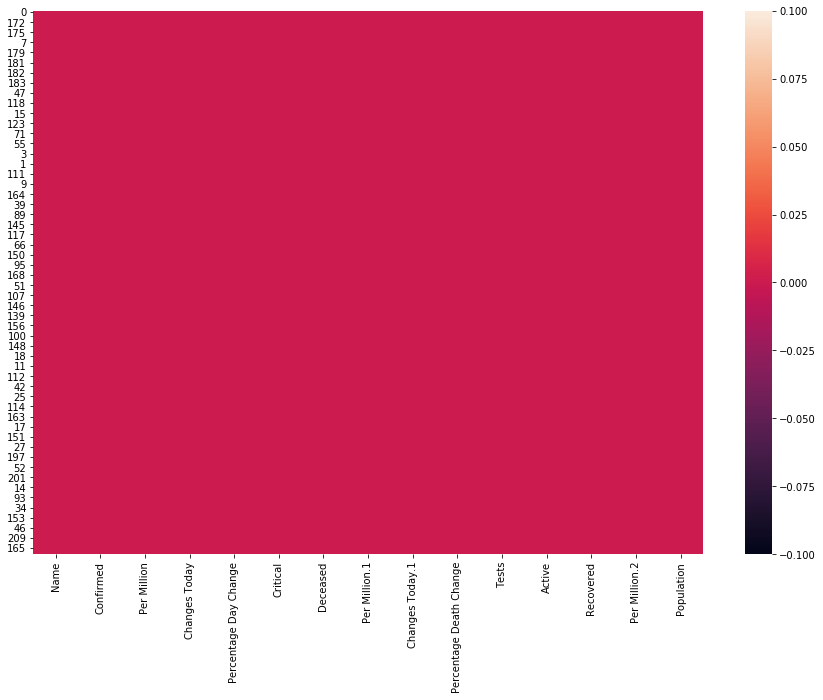

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(world_df.isnull())

#### We'll use plotly express for visualization.
1. It generates graphs which are interactive and user friendly.
2. We can use zoom in and zoom out feature for proper understanding to a specific part of graph.

In [12]:
import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#### Plot number of confirmed cases.

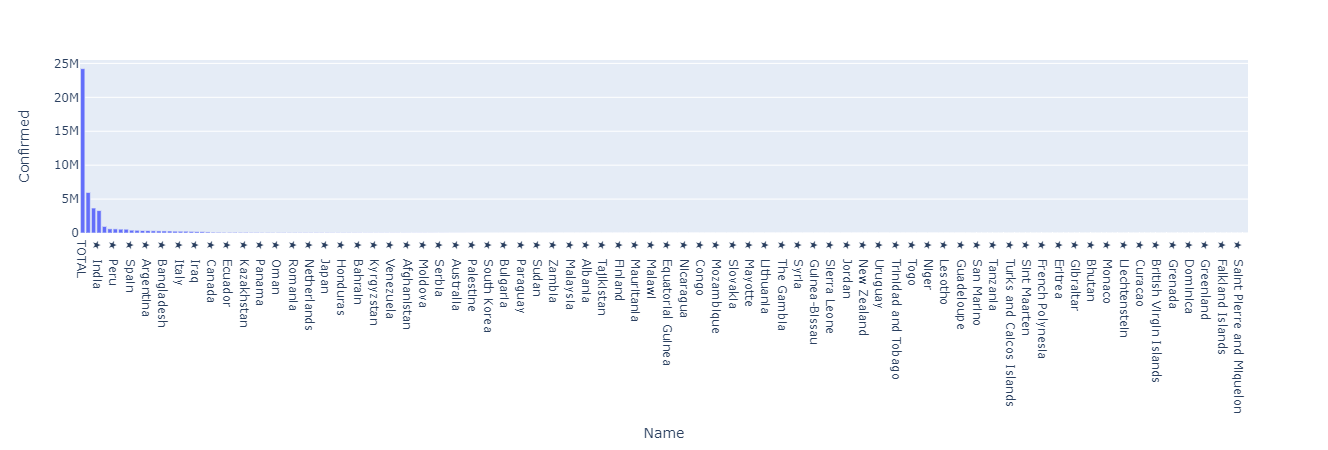

In [13]:
# plotting world_df based on confirmed cases by country names.

world_fig = px.bar(world_df, x = 'Name' , y = 'Confirmed')
world_fig.show()

 - We can zoom in the graph, thats the beauty of plotly.

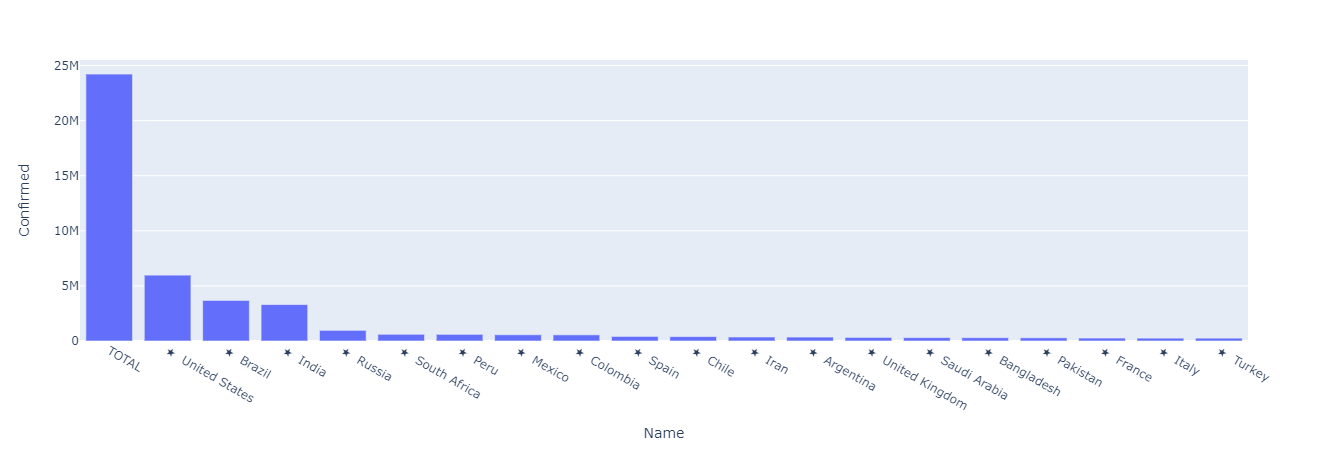

In [14]:
# Lets plot top 20 countries based on confirmed cases.

world_fig = px.bar(world_df.head(20), x = "Name" , y = 'Confirmed')
world_fig.show()

 - Now we can see United states holds number 1 position. (cough cough "we don't wear masks" - americans)
 - Brazil and India comes at the second and third position surpassing Russia respectively.

#### Now we'll try to explore the world_df in more details.(based on number of Deceased People)

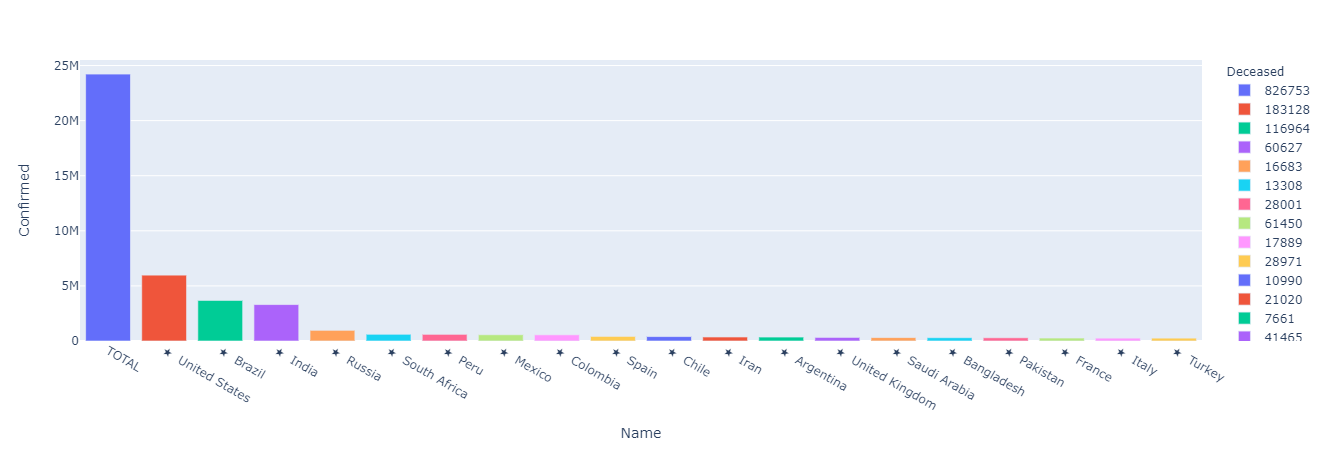

In [15]:
# Lets see how many people have died with respect to countries. (For top 20 countries)

world_fig = px.bar(world_df.head(20), x = 'Name', y = 'Confirmed', color = "Deceased")
world_fig.show()

 - Here the color of each bar corrosponds to how many people have died.
 - We cannot make out which country has most number of deceased people in a descending order.

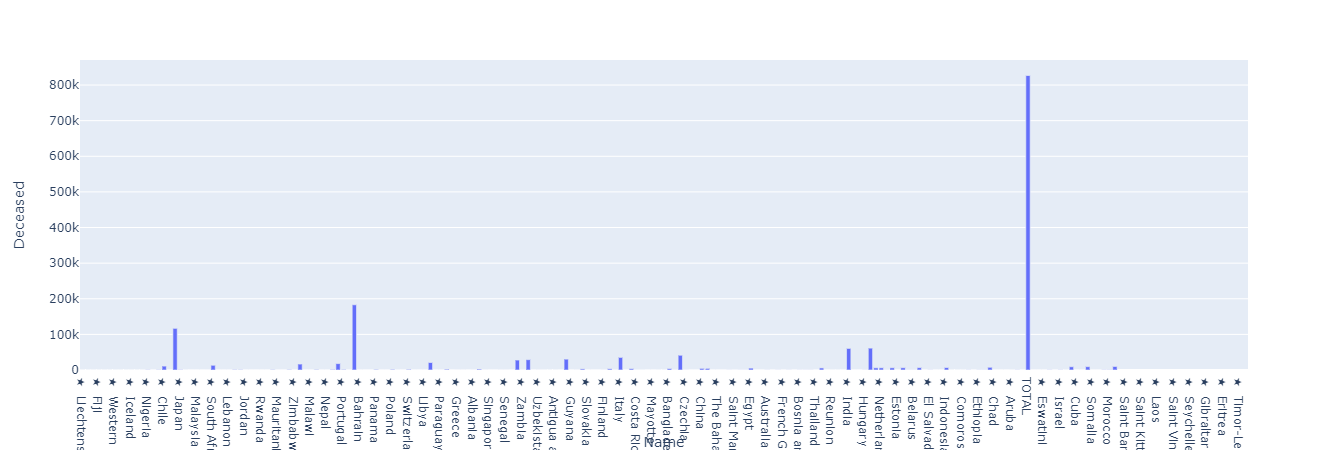

In [16]:
# lets visualize world_df based on death poll for top 20 countries.

world_fig = px.bar(world_df.sort_values('Deceased'), x = 'Name', y = 'Deceased')
world_fig.show()

 -  As you see here also we cannot make countres based on number of deceased people.
 - There is some some problem with world_df["Deceased"] column, let's fix that.

In [17]:
# lets grab the world_df based on deceased column.
world_df.sort_values('Deceased',ascending = False)

Name  Confirmed Per Million  Changes Today  \
213          ★  Anguilla          3           0              0   
153       ★  Timor-Leste         26          20              0   
197     ★  Faroe Islands        411           0              0   
198  ★  French Polynesia        372           0              0   
52            ★  Eritrea        315          89              0   
..                   ...        ...         ...            ...   
93      ★  Liechtenstein        102           0              0   
209        ★  Montserrat         13           0              0   
201    ★  Cayman Islands        205           0              0   
27            ★  Burundi        430          36              0   
165    ★  Western Sahara         10           0              0   

    Percentage Day Change Critical Deceased Per Million.1  Changes Today.1  \
213                    0%  Unknown  Unknown       Unknown                0   
153                    0%  Unknown  Unknown       Unknown                0   
197                    0%        2  Unknown       Unknown                0   
198                    0%        2  Unknown       Unknown                0   
52                     0%  Unknown  Unknown       Unknown                0   
..                    ...      ...      ...           ...              ...   
93                     0%  Unknown        1             0                0   
209                    0%  Unknown        1             0                0   
201                    0%  Unknown        1             0                0   
27                     0%  Unknown        1             0                0   
165                    0%  Unknown        1             0                0   

    Percentage Death Change    Tests   Active Recovered Per Million.2  \
213                      0%      662  Unknown         3             0   
153                      0%     5146  Unknown        25            19   
197                      0%    89790  Unknown       357             0   
198                      0%     9912  Unknown       148             0   
52                       0%  Unknown  Unknown       276            78   
..                      ...      ...      ...       ...           ...   
93                       0%      900        7        94             0   
209                      0%       61        0        12             0   
201                      0%    34688        2       202             0   
27                       0%    22093       84       345            29   
165                      0%  Unknown  Unknown         8             0   

    Population  
213      15023  
153    1322118  
197      48891  
198     281156  
52     3553724  
..         ...  
93       38145  
209       4992  
201      65838  
27    11940680  
165     599447  

[215 rows x 15 columns]

 - The column contains many unknown values.
 - We'll replace all the unknown values with zero.
 - Then we will arrange the column in descending order for visualization purpose.

In [18]:
# lets replace unknown values to 0.

world_df['Deceased'].replace("Unknown", 0,inplace=True)
world_df['Deceased'] = pd.to_numeric(world_df['Deceased'])          #convert column from type object to int64
world_df['Deceased']

0      826753
169    183128
170    116964
171     60627
172     16683
        ...  
211         0
70          0
165         1
212         0
213         0
Name: Deceased, Length: 215, dtype: int64

In [19]:
# now again lets grab world_df based on deceased column.

world_df.sort_values('Deceased',ascending = False)

Name  Confirmed Per Million  \
0                                  TOTAL   24226129        3118   
169                     ★  United States    5979233       18048   
170                            ★  Brazil    3683224       17309   
174                            ★  Mexico     568621        4403   
171                             ★  India    3307575        2393   
..                                   ...        ...         ...   
130  ★  Saint Vincent and the Grenadines         58           0   
29                           ★  Cambodia        273          16   
200                         ★  Gibraltar        270           0   
136                        ★  Seychelles        136           0   
213                          ★  Anguilla          3           0   

     Changes Today Percentage Day Change Critical  Deceased Per Million.1  \
0           174858                 0.73%    61832    826753           106   
169          23505                 0.39%    16511    183128           553   
170           9048                 0.25%     8318    116964           550   
174           4916                 0.87%     3442     61450           476   
171          75821                 2.35%     8944     60627            44   
..             ...                   ...      ...       ...           ...   
130              0                    0%  Unknown         0       Unknown   
29               0                    0%        1         0       Unknown   
200             14                 5.47%  Unknown         0       Unknown   
136              0                    0%  Unknown         0       Unknown   
213              0                    0%  Unknown         0       Unknown   

     Changes Today.1 Percentage Death Change      Tests   Active Recovered  \
0               4027                   0.49%  423263559  6751220  16511188   
169              724                    0.4%   78270815  2534431   3261674   
170              298                   0.26%   14172764   717865   2848395   
174              650                   1.07%    1278436   114070    393101   
171             1015                    1.7%   37651512   725653   2521295   
..               ...                     ...        ...      ...       ...   
130                0                      0%       3214  Unknown        57   
29                 0                      0%      91159  Unknown       264   
200                0                      0%      31747  Unknown       203   
136                0                      0%    Unknown  Unknown       127   
213                0                      0%        662  Unknown         3   

    Per Million.2  Population  
0            2125  7769695146  
169          9845   331298704  
170         13386   212789010  
174          3044   129136438  
171          1824  1382048762  
..            ...         ...  
130             0      110994  
29             16    16753390  
200             0       33689  
136             0       98440  
213             0       15023  

[215 rows x 15 columns]

 - Perfecto!. Now we can see that column has been cleared off all the "Unknown".

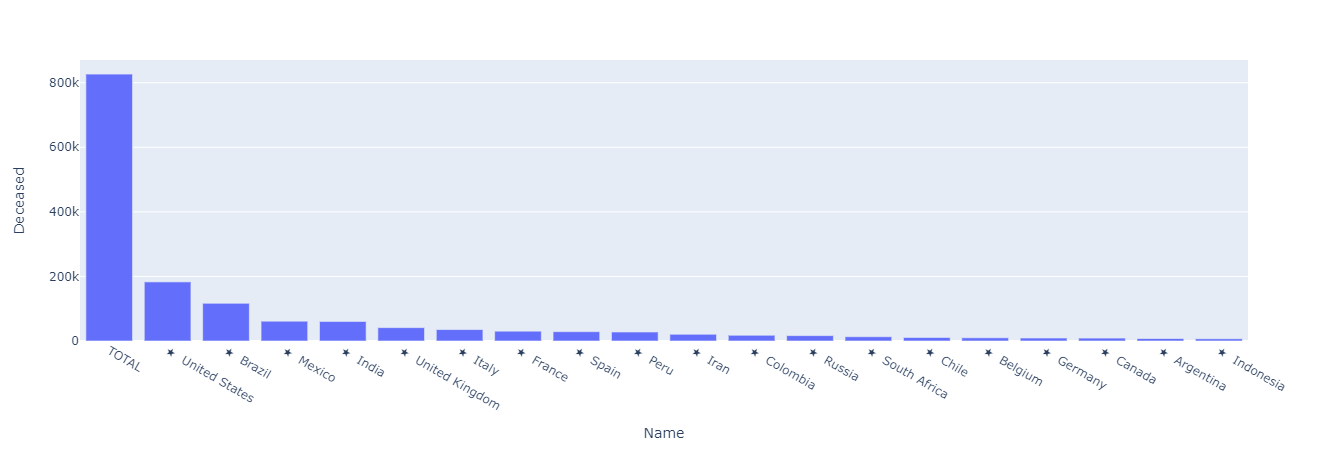

In [20]:
# lets again try ro visualize world_df based on death poll for top 20 countries.

world_fig = px.bar(world_df.sort_values('Deceased', ascending=False).head(20), x = 'Name' , y = 'Deceased')
world_fig.show()


#### Click on the link for more information.

 - United States tops the chart. <a href = "https://www.sciencemag.org/news/2020/04/united-states-leads-coronavirus-cases-not-pandemic-response" > If you want to know why United States leads in coronvirus cases, but not pandemic response</a>
 - Brazil also surpasses 100,000 deaths and becomes the one of the worst affected countries. <a href = "https://www.ctvnews.ca/health/coronavirus/death-became-normal-brazil-surpasses-100-000-deaths-from-covid-19-1.5056757" >'Death became normal': Brazil surpasses 100,000 deaths from COVID-19</a>
 - Mexico's death toll also reached 59.106k and many young people are dying of COVID-19 <a href = "https://www.forbes.com/sites/nathanielparishflannery/2020/07/24/why-are-so-many-young-people-dying-of-covid-19-in-mexico-city/#148bc1f22792">Why Are So Many Young People Dying Of Covid-19 In Mexico City?</a>
 - India has also reached 56k and there are many questions about India's rising COVID-19 infection <a href ="https://www.bbc.com/news/world-asia-india-53018351">Five key questions about India's rising Covid-19 infections</a>

#### Lets visualize the death toll in relation to total confirmed case

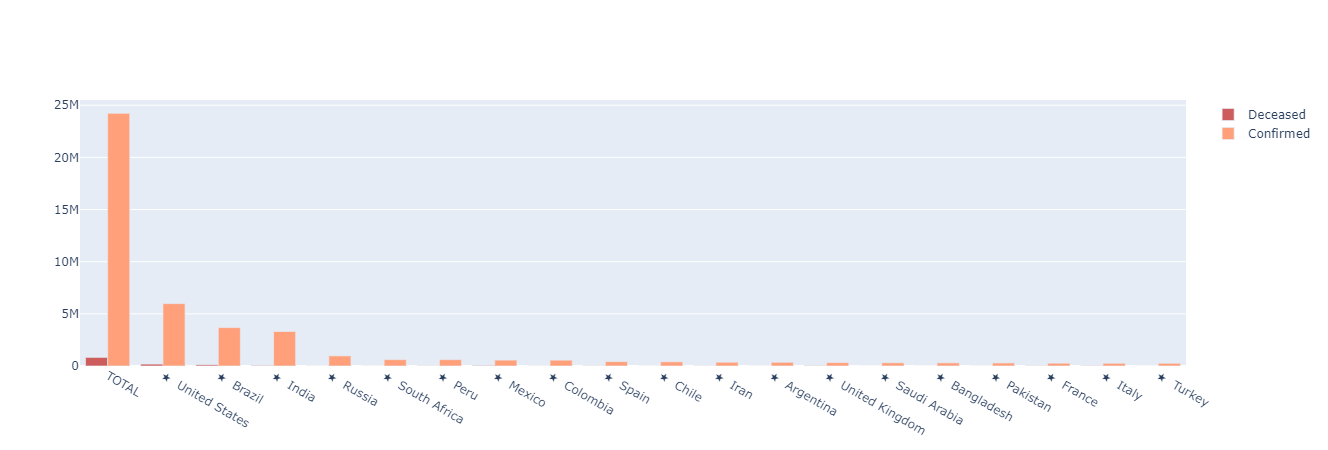

In [21]:
# lets visualize the death toll based on total confirmed case

import plotly.graph_objects as go


# for grouped barplot using Deceased numbers per country and total number of cases per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Deceased"].head(20),
    name = "Deceased",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Confirmed'].head(20),
    name = 'Confirmed',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - Here we can see the Death toll is very low as compared to confirmed cases, which is because most of the people recover from COVID-19. Early estimates predicted that the overall COVID-19 recovery rate is between 97% and 99.75%.
 - Mortality rate calculated  = 3.4% (802.318k/23.09665M)

#### lets visualize the recovered cases based on total confirmed case

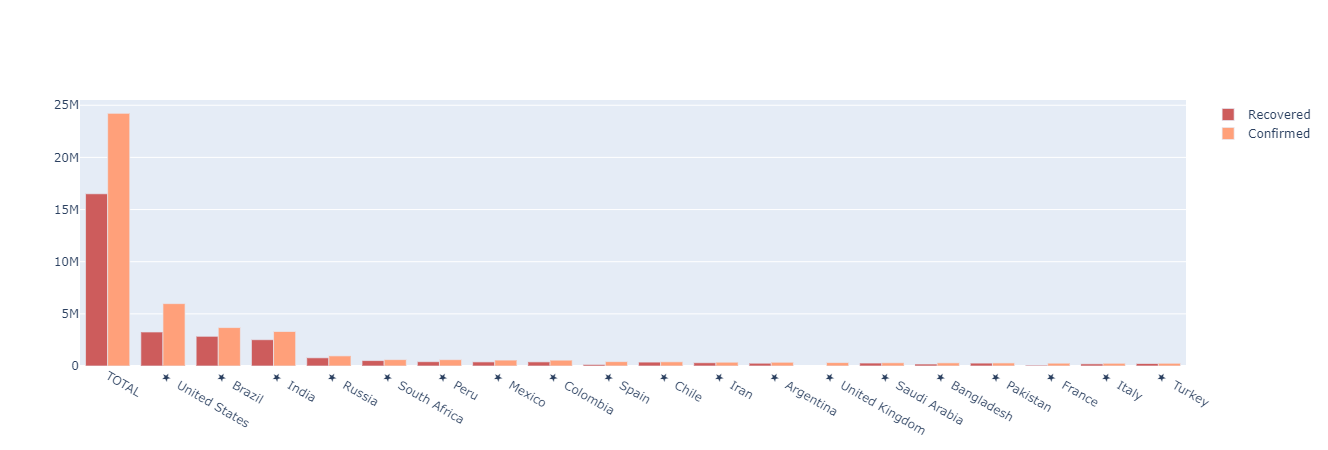

In [22]:
# lets visualize the recovered case based in relation to total confirmed case

import plotly.graph_objects as go


# for grouped barplot using recovered cases per country and total number of cases per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Recovered"].head(20),
    name = "Recovered",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Confirmed'].head(20),
    name = 'Confirmed',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - Here we can see how many person recovered in relation to total cases registered.
 - Recovery rate  = 67% (15.4827M/23.09665M), this contradicts early predicted value of recovery rate which was 97%.
 - Recovery rate and mortality rate are based on how well a country is implementing the testing of its people. <a href = "https://www.who.int/news-room/commentaries/detail/estimating-mortality-from-covid-19">Estimating mortality from COVID-19</a>

#### Lets see who has implemented testing vastly.

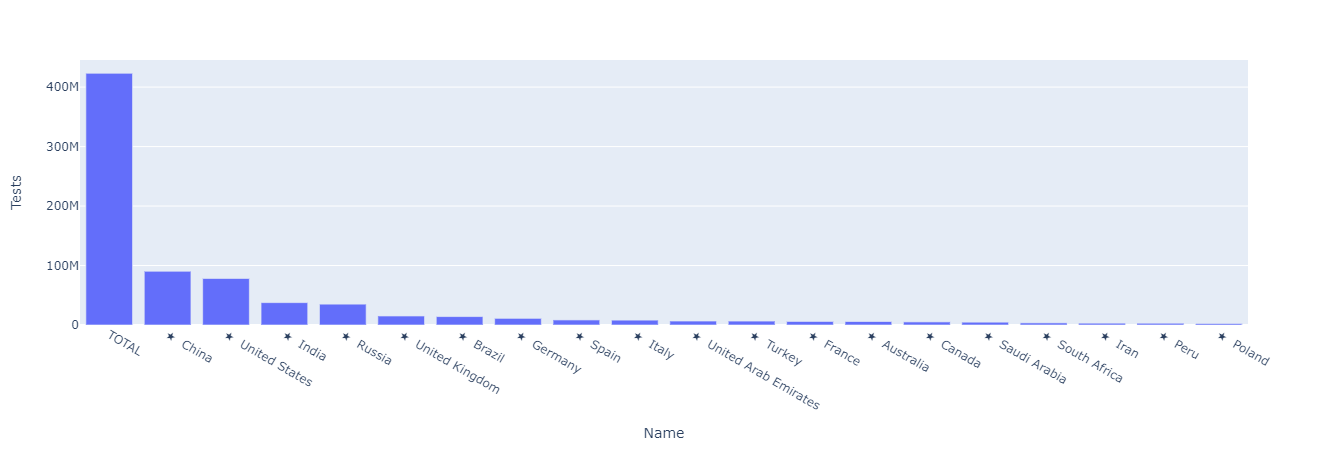

In [23]:
# replace unknown values from the column

world_df['Tests'].replace("Unknown", 0, inplace=True)
world_df['Tests'] = pd.to_numeric(world_df['Tests'])          #convert column from type object to int64



#Now lets plot the data

world_fig = px.bar(world_df.sort_values('Tests', ascending=False).head(20), x = 'Name' , y = 'Tests')
world_fig.show()

 - China on first position that was unexpected. I was expecting United States.
 - As you can see the countries who are vastly testing their people have a upper hand on curbing the spread of virus by implementing policies.

#### lets explore the Confirmed cases in relation to total population

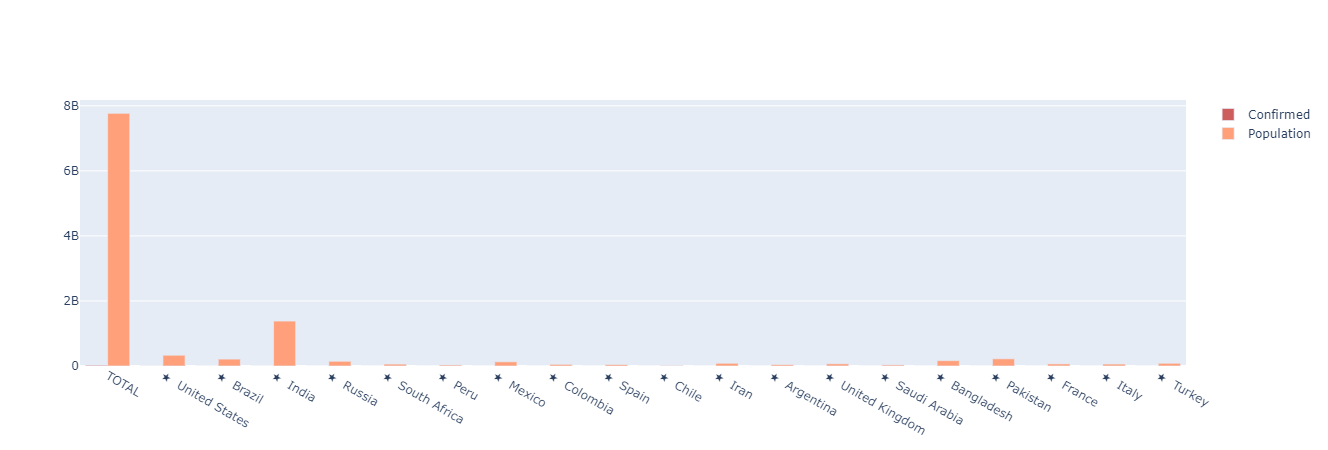

In [24]:
# lets visualize the confirmed case based in relation to total population

import plotly.graph_objects as go


# for grouped barplot using confirmed cases per country and population per country.

fig = go.Figure(data = [
go.Bar(
    x = world_df['Name'],
    y = world_df["Confirmed"].head(20),
    name = "Confirmed",
    marker_color = "indianred"
),
go.Bar(
    x = world_df['Name'],
    y = world_df['Population'].head(20),
    name = 'Population',
    marker_color = "lightsalmon"
)
])

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group')
fig.show()

 - This graph shows a small percentage of people are affected by the novel coronavirus. <a href = "https://www.canada.ca/en/public-health/services/publications/diseases-conditions/people-high-risk-for-severe-illness-covid-19.html">
    People who are at high risk for severe illness from COVID-19</a>

#### Lets plot world data using Choropleth Map

In [25]:
world_df.iloc[1:]['Name']

169                ★  United States
170                       ★  Brazil
171                        ★  India
172                       ★  Russia
142                 ★  South Africa
                   ...             
211             ★  Falkland Islands
70                  ★  Vatican City
165               ★  Western Sahara
212    ★  Saint Pierre and Miquelon
213                     ★  Anguilla
Name: Name, Length: 214, dtype: object

In [26]:
# For using choropleth first we have to make a dictionary

data = dict(
        type = 'choropleth',
        locations = world_df.iloc[1:]['Name'],
        z = world_df.iloc[1:]['Confirmed'],
        text = world_df.iloc[1:]['Deceased'],
        marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
        colorbar = {'title' : "Confirmed Cases"}
        )

In [27]:
# Now create a layout for the graph

layout = dict(
    title = 'World COVID-19 Stats',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

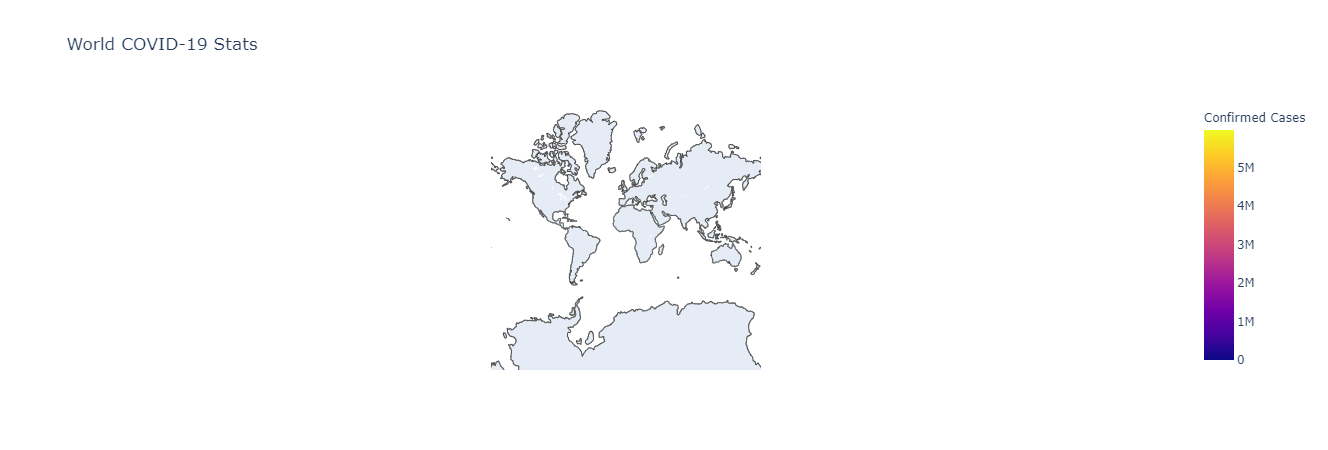

In [28]:
# Finally we will pass both layout and data dictionary to generate the map.

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [29]:
#something worng with the country names. plotly uses standard ISO-3_codes. Lets try to create a column for country codes

print("{} countries in the list.". format(world_df['Name'].nunique()))

215 countries in the list.


In [30]:
world_df['Name']

0                             TOTAL
169                ★  United States
170                       ★  Brazil
171                        ★  India
172                       ★  Russia
                   ...             
211             ★  Falkland Islands
70                  ★  Vatican City
165               ★  Western Sahara
212    ★  Saint Pierre and Miquelon
213                     ★  Anguilla
Name: Name, Length: 215, dtype: object

#### The country converter (coco) - a Python package for converting country names between different classifications schemes.
<a href = "https://pypi.org/project/country-converter/">For more info please click here</a>.

In [31]:
import country_converter as coco

In [32]:
# Creating a list and appending all the names from world_df column.

Names = []
for i in range(1,215):
    Names.append(world_df.iloc[i]['Name'][3:])

# Insert Total at index 0. we left that because it doesn't contain any start in it.

Names.insert(0,'TOTAL')

In [33]:
Names

['TOTAL',
 'United States',
 'Brazil',
 'India',
 'Russia',
 'South Africa',
 'Peru',
 'Mexico',
 'Colombia',
 'Spain',
 'Chile',
 'Iran',
 'Argentina',
 'United Kingdom',
 'Saudi Arabia',
 'Bangladesh',
 'Pakistan',
 'France',
 'Italy',
 'Turkey',
 'Germany',
 'Iraq',
 'Philippines',
 'Indonesia',
 'Canada',
 'Qatar',
 'Bolivia',
 'Ecuador',
 'Ukraine',
 'Israel',
 'Kazakhstan',
 'Egypt',
 'Dominican Republic',
 'Panama',
 'Sweden',
 'China',
 'Oman',
 'Belgium',
 'Kuwait',
 'Romania',
 'Belarus',
 'Guatemala',
 'Netherlands',
 'United Arab Emirates',
 'Poland',
 'Japan',
 'Singapore',
 'Portugal',
 'Honduras',
 'Morocco',
 'Nigeria',
 'Bahrain',
 'Ethiopia',
 'Ghana',
 'Kyrgyzstan',
 'Armenia',
 'Algeria',
 'Venezuela',
 'Switzerland',
 'Uzbekistan',
 'Afghanistan',
 'Azerbaijan',
 'Costa Rica',
 'Moldova',
 'Nepal',
 'Kenya',
 'Serbia',
 'Ireland',
 'Austria',
 'Australia',
 'El Salvador',
 'Czechia',
 'Palestine',
 'Cameroon',
 'Bosnia and Herzegovina',
 'South Korea',
 'Ivory Coas

In [34]:
standard_names = coco.convert(names= Names, to='ISO3')
print(len(standard_names))

215


In [35]:
# Adding the ISO3 code in a new world_df['Code'] column.

world_df['Code'] = standard_names

In [36]:
# Removing countries of which ISO3 code is not available

choropleth_data = world_df[world_df['Code'] != "not found"]
choropleth_data

Name  Confirmed Per Million  Changes Today  \
169              ★  United States    5979233       18048          23505   
170                     ★  Brazil    3683224       17309           9048   
171                      ★  India    3307575        2393          75821   
172                     ★  Russia     970865        6652           4676   
142               ★  South Africa     613017       10317              0   
..                            ...        ...         ...            ...   
211           ★  Falkland Islands         13           0              0   
70                ★  Vatican City         12           0              0   
165             ★  Western Sahara         10           0              0   
212  ★  Saint Pierre and Miquelon          5           0              0   
213                   ★  Anguilla          3           0              0   

    Percentage Day Change Critical  Deceased Per Million.1  Changes Today.1  \
169                 0.39%    16511    183128           553              724   
170                 0.25%     8318    116964           550              298   
171                 2.35%     8944     60627            44             1015   
172                 0.48%     2300     16683           114              115   
142                    0%      539     13308           224                0   
..                    ...      ...       ...           ...              ...   
211                    0%  Unknown         0       Unknown                0   
70                     0%  Unknown         0       Unknown                0   
165                    0%  Unknown         1             0                0   
212                    0%  Unknown         0       Unknown                0   
213                    0%  Unknown         0       Unknown                0   

    Percentage Death Change     Tests   Active Recovered Per Million.2  \
169                    0.4%  78270815  2534431   3261674          9845   
170                   0.26%  14172764   717865   2848395         13386   
171                    1.7%  37651512   725653   2521295          1824   
172                   0.69%  35100000   168032    786150          5387   
142                      0%   3578836    79328    520381          8758   
..                      ...       ...      ...       ...           ...   
211                      0%      2256  Unknown        13             0   
70                       0%         0  Unknown        12             0   
165                      0%         0  Unknown         8             0   
212                      0%         0  Unknown         1             0   
213                      0%       662  Unknown         3             0   

     Population Code  
169   331298704  USA  
170   212789010  BRA  
171  1382048762  IND  
172   145944161  RUS  
142    59420382  ZAF  
..          ...  ...  
211        3494  FLK  
70          801  VAT  
165      599447  ESH  
212        5790  SPM  
213       15023  AIA  

[212 rows x 16 columns]

In [37]:
#lets again try to plot the data using choropleth dataframe.

# For using choropleth first we have to make a dictionary

data = dict(
        type = 'choropleth',
        locations = choropleth_data['Code'],
        z = choropleth_data['Confirmed'],
        text = choropleth_data['Deceased'],
        marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
        colorbar = {'title' : "Confirmed Cases"}
        )

In [38]:
# Now create a layout for the graph

layout = dict(
    title = 'World COVID-19 Stats',
    geo = dict(
        showframe = False,
        projection = {'type':'mercator'}
    )
)

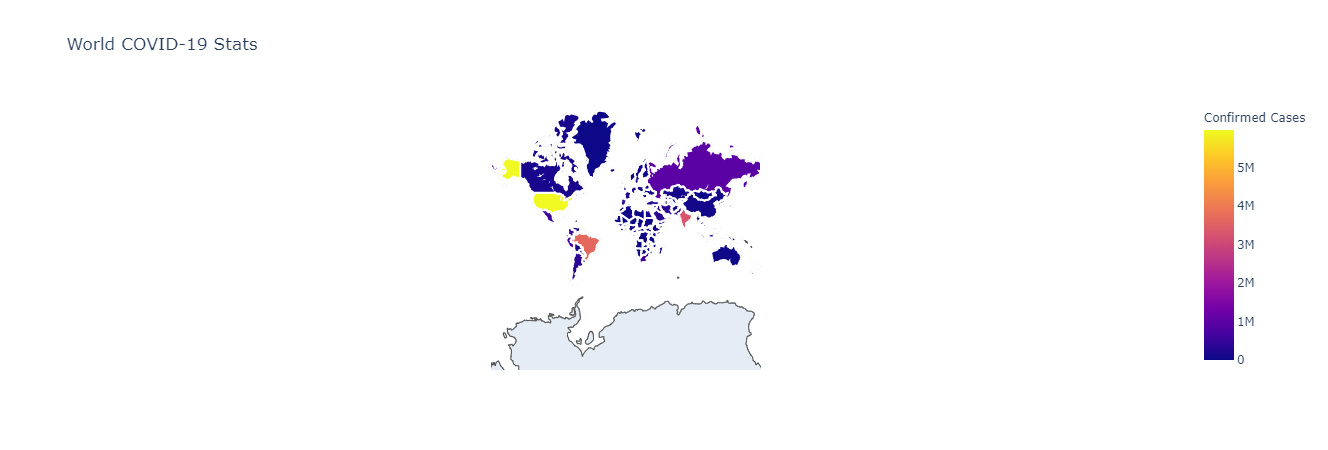

In [39]:
# Finally we will pass both layout and data dictionary to generate the map.

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

## Canada COVID-19 Stats

#### Lets get Latest Canada's information.
1. We'll use the pandas read.html which lets us read the webpage table without much of complexity.
2. We can also use the lsit to convert it to a dataframe.
3. In the header of the list generated you see a number "1", which was used in the original website as a filter for arranging data in ascending or descending order.

In [40]:
#grabbing latest canada specific data

url = "https://ncov2019.live/data/canada"

r = requests.get(url)
df_list = pd.read_html(r.text) # this parses all the tables in webpages to a list
canada_df = df_list[2]
canada_df

Name  Confirmed Per Million  Changes Today  \
0                          TOTAL     127890     Unknown              0   
1                     ★  Alberta      13083     Unknown              0   
2            ★  British Columbia       5242     Unknown              0   
3                    ★  Manitoba       1018     Unknown              0   
4               ★  New Brunswick        190     Unknown              0   
5   ★  Newfoundland and Labrador        268     Unknown              0   
6       ★  Northwest Territories          5     Unknown              0   
7                 ★  Nova Scotia       1080     Unknown              0   
8                     ★  Ontario      43541     Unknown              0   
9        ★  Prince Edward Island         44     Unknown              0   
10                     ★  Quebec      61803     Unknown              0   
11               ★  Saskatchewan       1601     Unknown              0   
12                      ★  Yukon         15     Unknown              0   

   Percentage Day Change Critical Deceased Per Million.1  Changes Today.1  \
0                     0%       44     9135       Unknown                0   
1                     0%  Unknown      235       Unknown                0   
2                     0%  Unknown      203       Unknown                0   
3                     0%  Unknown       13       Unknown                0   
4                     0%  Unknown        2       Unknown                0   
5                     0%  Unknown        3       Unknown                0   
6                     0%  Unknown  Unknown       Unknown                0   
7                     0%  Unknown       65       Unknown                0   
8                     0%  Unknown     2845       Unknown                0   
9                     0%  Unknown  Unknown       Unknown                0   
10                    0%  Unknown     5746       Unknown                0   
11                    0%  Unknown       23       Unknown                0   
12                    0%  Unknown  Unknown       Unknown                0   

   Percentage Death Change    Tests   Active  Recovered Per Million.2  \
0                       0%  5205086     4958     113796       Unknown   
1                       0%  Unknown  Unknown      11714       Unknown   
2                       0%  Unknown  Unknown       4114       Unknown   
3                       0%  Unknown  Unknown        606       Unknown   
4                       0%  Unknown  Unknown        178       Unknown   
5                       0%  Unknown  Unknown        265       Unknown   
6                       0%  Unknown  Unknown          5       Unknown   
7                       0%  Unknown  Unknown       1011       Unknown   
8                       0%  Unknown  Unknown      39507       Unknown   
9                       0%  Unknown  Unknown         41       Unknown   
10                      0%  Unknown  Unknown      54850       Unknown   
11                      0%  Unknown  Unknown       1490       Unknown   
12                      0%  Unknown  Unknown         15       Unknown   

   Population  
0     Unknown  
1     Unknown  
2     Unknown  
3     Unknown  
4     Unknown  
5     Unknown  
6     Unknown  
7     Unknown  
8     Unknown  
9     Unknown  
10    Unknown  
11    Unknown  
12    Unknown

## Canada COVID-19 Stats

#### Lets visualize Canada's Data and see which province has been worst effected.
1. We'll use the same above canada_df for visualization purpose.
2. We are going to use this dataframe because it's the latest data and our script we'll update the data every time we run the cell based on the website mentioned above.
3. I'm going to use plotly for visualization purpose as it generates graphs which are interactive and user friendly.

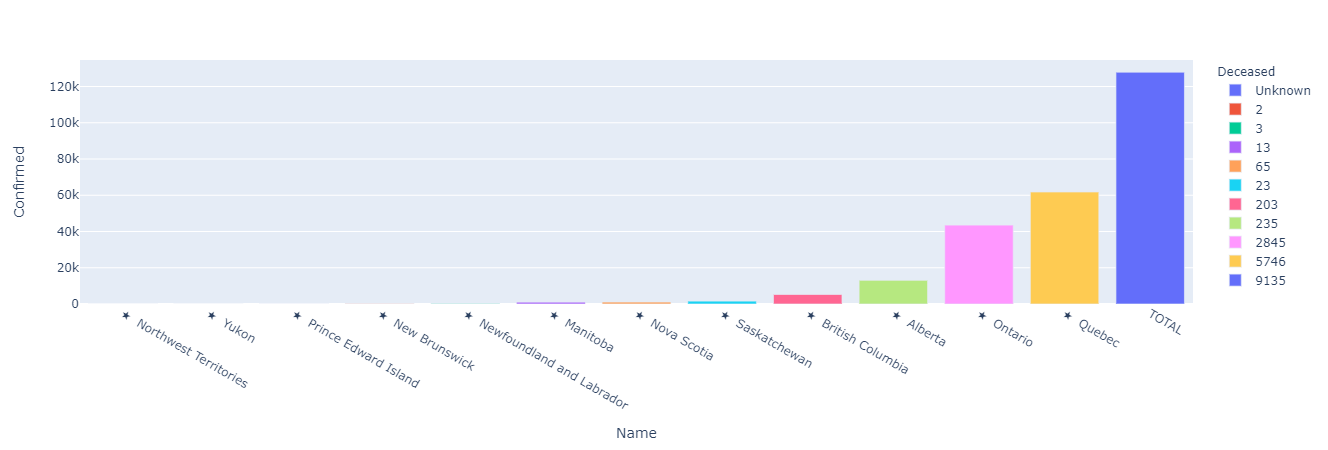

In [41]:
canada_fig = px.bar(canada_df.sort_values('Confirmed'),x='Name',y='Confirmed',color="Deceased")
canada_fig.show()

 - Quebec has maximum number of confirmed cases and twice as many deceased people than ontario. <a href = "https://www.ctvnews.ca/health/coronavirus/quebec-leads-canada-in-coronavirus-deaths-so-why-is-it-starting-to-reopen-1.4928940"> Quebec leads Canada in Coronavirus deaths</a>
 - In this article I also found one more interesting thing that Alberta has done more testing per capita, and along with good policies the death polls remains below 500.
 - There a some provinces where there were less to no cases, and no death has been reported, because quite a few people live there.

#### Lets see relation between total confirmed cases to recovered cases.

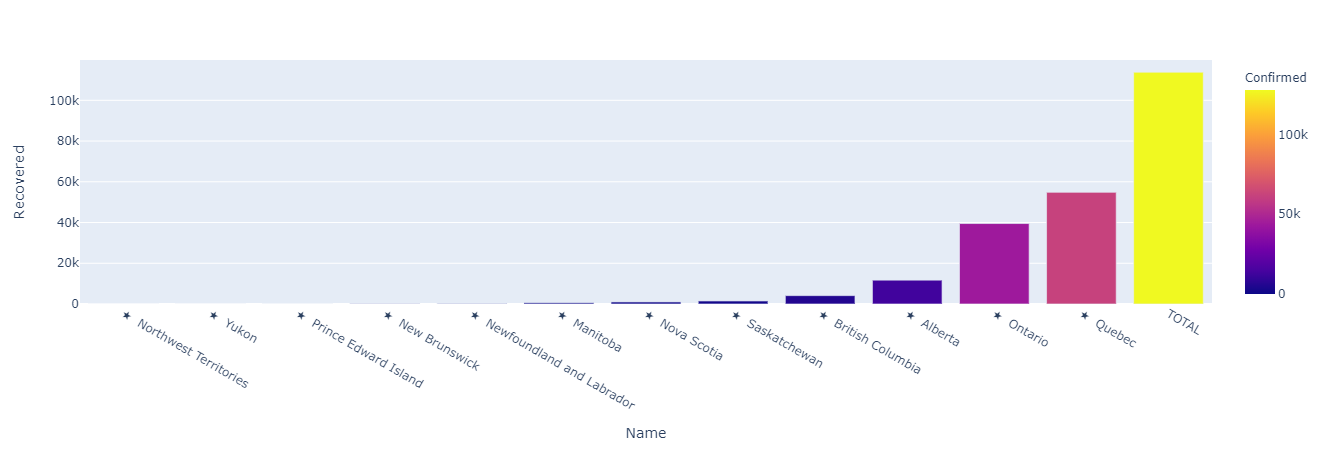

In [42]:
canada_fig = px.bar(canada_df.sort_values('Recovered'), x = 'Name', y = 'Recovered',color='Confirmed')
canada_fig.show()

#### Lets calculate recovery rate in Canada and Alberta specifically

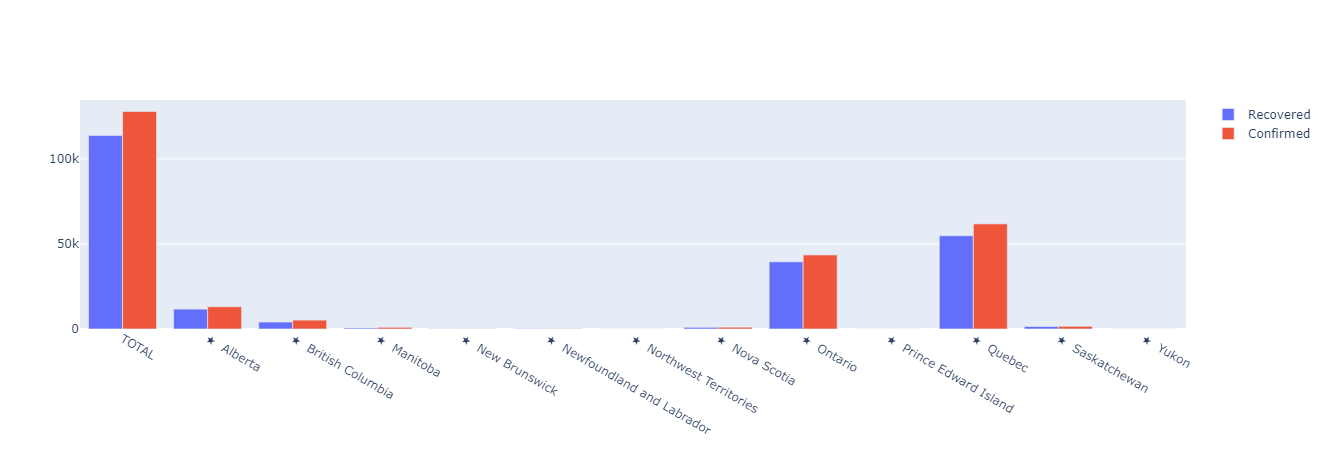

In [43]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Recovered'],
    name = "Recovered"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Confirmed'],
    name = "Confirmed"
    )
])

fig.update_layout(barmode = "group")
fig.show()

 - Recovery rate canada wide is 88% which is 21% higher than the worldwide recovery rate. This also brings in another factor the geographical location a patient is in and how is the healthcare system there.
 - Alberta's recovery rate is also 89% which is close to overall recovery rate.   

#### lets calculate mortality rate.

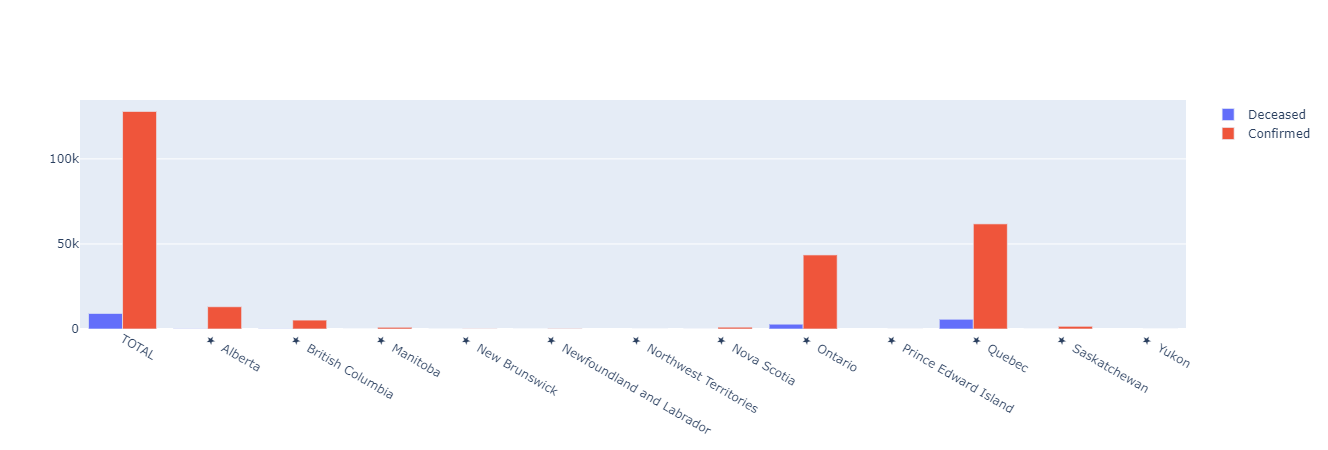

In [44]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Deceased'],
    name = "Deceased"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Confirmed'],
    name = "Confirmed"
    )
])

fig.update_layout(barmode = "group")
fig.show()

 - Mortality rate of overall canada is 7% (9118/126.804k)
 - Mortality rate of Alberta is 1.8% which is quite astounding. Alberta is implementing policies very efficiently and because of that it has such a low mortality rate.
 - Highest mortality rate is of Quebec 8.9%.
 - Second highest mortality rate is of ontario 6.5%

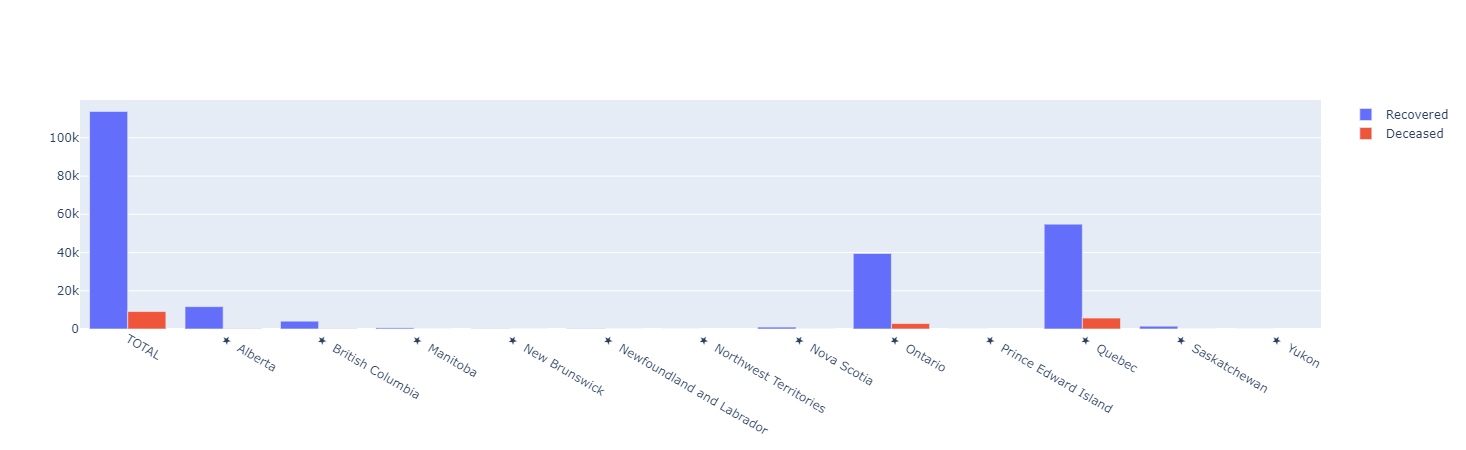

In [45]:
fig = go.Figure(data = [
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Recovered'],
    name = "Recovered"
    ),
    
    go.Bar(
    x = canada_df['Name'],
    y = canada_df['Deceased'],
    name = "Deceased"
    )
])

fig.update_layout(barmode = "group")
fig.show()